In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem, t
import seaborn as sns
import statsmodels.api as sm

import os

In [3]:
df = pd.read_csv('loans_income.csv')
df.head()

50000

## The Bootstrap

In [18]:
loans_income = np.array(df)
loans_income[:5]

array([[ 67000],
       [ 52000],
       [100000],
       [ 78762],
       [ 37041]], dtype=int64)

In [19]:
# Making a flat list from list of lists
loans_income =  np.array([item for sublist in loans_income for item in sublist])

In [20]:
def bootstrap(l, R):
    n = len(loans_income)
    # Number of Bootstrap samples
    means_of_boot_samples = []
    for reps in range(R):
        #steps 1,2
        boot_sample = np.random.choice(loans_income, size=n)
        #step 3
        means_of_boot_samples.append(round(np.mean(boot_sample), 2))
    return means_of_boot_samples

bootstrap(loans_income, 5)


[68558.77, 68731.12, 68983.07, 68497.16, 68553.92]

Now as we have a means of bootstrap samples we can estimate:

A. Their standard deviation (this estimates sample mean standard error)

In [21]:
np.std(bootstrap(loans_income, 100))

154.33540687593418

## Produce a histogram or boxplot

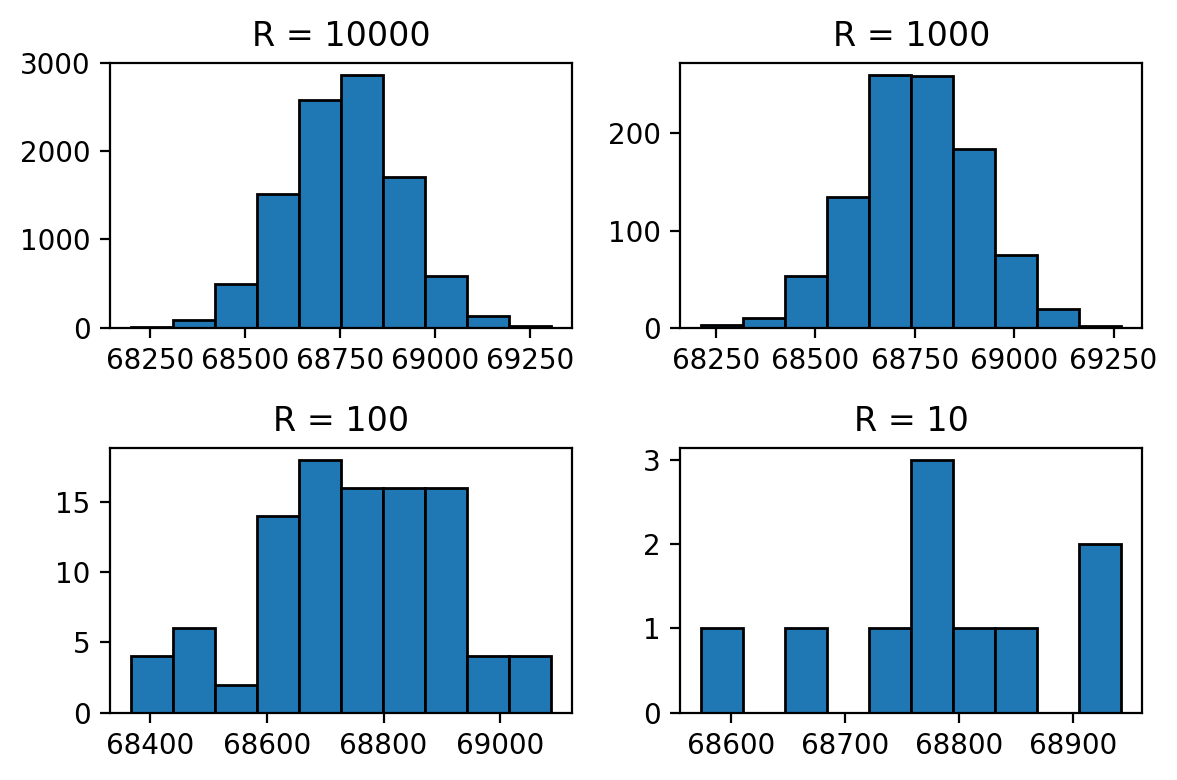

In [25]:
plt.figure(dpi = 200)

plt.subplot(221)
plt.title('R = 10000')
plt.hist(bootstrap(loans_income, 10000), edgecolor = 'k')


plt.subplot(222)
plt.title('R = 1000')
plt.hist(bootstrap(loans_income, 1000), edgecolor = 'k')


plt.subplot(223)
plt.title('R = 100')
plt.hist(bootstrap(loans_income, 100), edgecolor = 'k')


plt.subplot(224)
plt.title('R = 10')
plt.hist(bootstrap(loans_income, 10), edgecolor = 'k')

plt.tight_layout()

As we can see distribution of 10000 means is more compact and bell_shaped than the distribution with samller amount of means. 
This phenomenon is termed as central limit theorem.


Find a confidence interval

In [28]:
data = bootstrap(loans_income, 1000)
low_lim, up_lim = np.percentile(data, 2.5), np.percentile(data, 95)
print('Lower Limit:', low_lim)
print('Upper Limit:', up_lim)

Lower Limit: 68472.573
Upper Limit: 69013.4325


C:\Users\rishi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


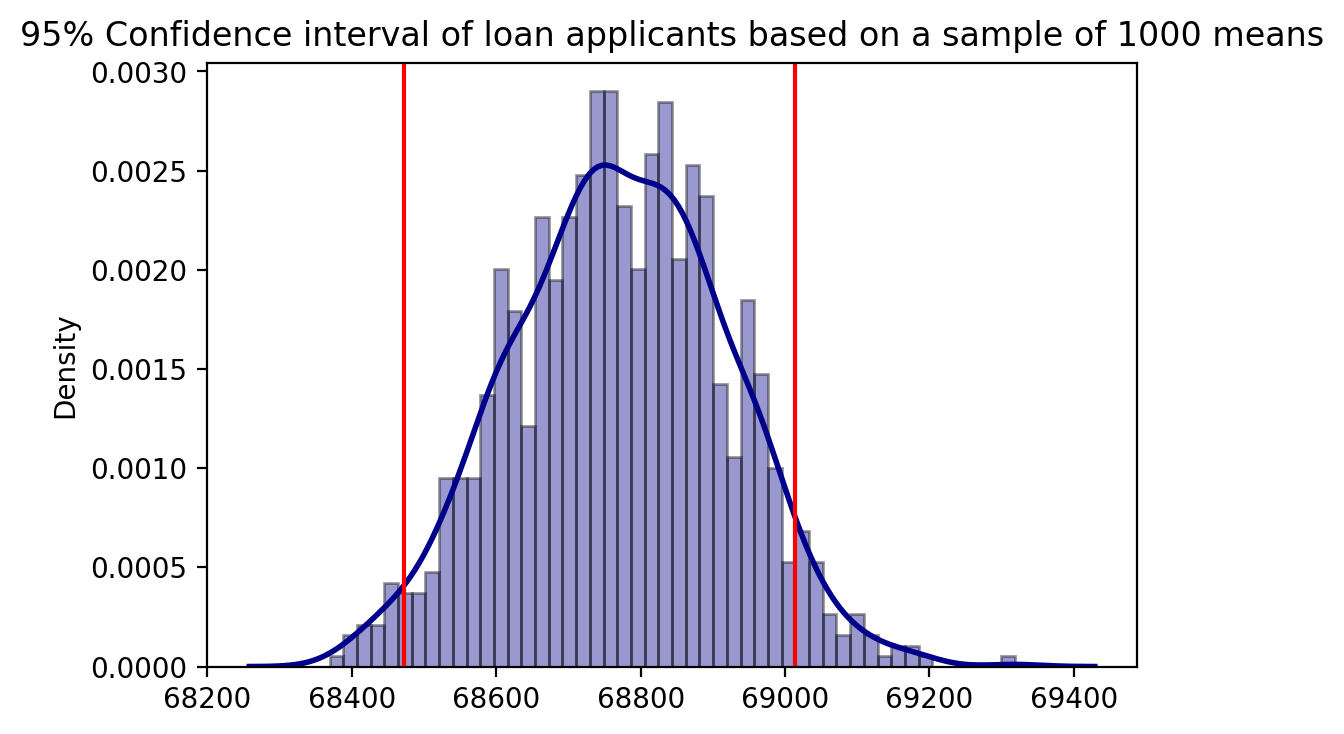

In [30]:
plt.figure(dpi = 200)
plt.title("95% Confidence interval of loan applicants based on a sample of 1000 means")

sns.distplot(bootstrap(loans_income, 1000), hist= True, kde= True,
            color = 'darkblue', bins = 50,
            hist_kws = {'edgecolor': 'black'},
            kde_kws = {'linewidth': 2})
plt.axvline(x=low_lim, color='red')
plt.axvline(x=up_lim, color='red')